In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/IRIS.csv')

# Display first rows
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
[['sepal_length', 'sepal_width',' petal_length', 'petal_width',' species']]


[['sepal_length', 'sepal_width', ' petal_length', 'petal_width', ' species']]

In [8]:
X = data.iloc[:, 0:2]   # Using first TWO features for visualization
y = data.iloc[:, -1]    # Species column

le = LabelEncoder()
y = le.fit_transform(y)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [11]:
def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('SVM Decision Boundary (Iris Dataset)')
    plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


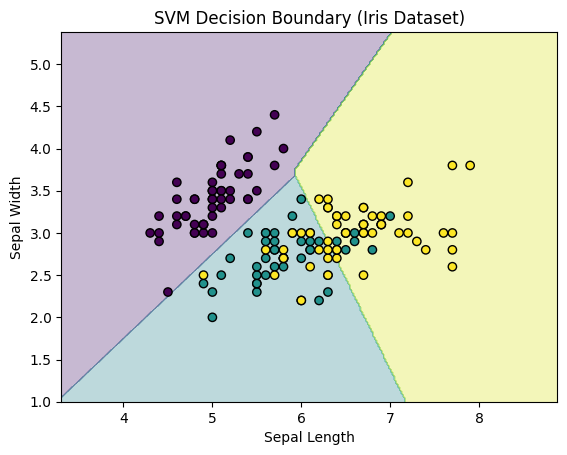

In [12]:
plot_decision_boundary(svm_model, X, y)
